In [1]:
from scipy.signal import find_peaks
from scipy.io import wavfile
import numpy as np
import pandas as pd
import numpy.fft as npf
import matplotlib
import matplotlib.pyplot as plt
from scripts.graph import qp

In [2]:
fs, data = wavfile.read('./440.wav')

In [3]:
def getfft(data,r=True):
    '''r is to keep only the non redundant data (split at half)
    '''
    N=len(data)
    fft=npf.fftshift(abs(npf.fft(data[0:N])))
    if r:
        return fft[len(fft)//2:]
    else:
        return fft
    
    

In [4]:

def detectNMax(data,SR=44100):
    N=len(data)
    t=N/SR
    fftr=getfft(data)
    x=[a/t for a in range(0,int(N/2))]

    peaks=find_peaks(fft, threshold=10000)[0]
    xarr=[x[p] for p in list(peaks)]
    yarr=fftr[list(peaks)]
    g=qp(fftr,x)
    g.set_xlim(0,xarr[-1]+100)#arbitraire
    g.scatter(xarr,yarr,marker='o', c='r')
    for x,y in zip(xarr,yarr):
        plt.text(x,y, str(x), fontsize=20)


def detectNMaxFreq(data,threshold=100000):
    '''data is the signal where peaks have to be detected
    basically just calls scipy to do the job, but bundles the height of peaks
    '''
    N=len(data)
    peaks=list(find_peaks(data, threshold)[0])
    height=data[peaks]
    return peaks,height

def plotNptsOnfft(fft,xarr,yarr,SR=44100):
    N=len(fft)
    t=2*N/SR
    print(len(fft))
    xfr=[a/t for a in range(N)]
    print(len(xfr))
    g=qp(fft,xfr)
    xarr=[xfr[x] for x in xarr]

    g.set_xlim(0,xarr[-1]+200)
    g.scatter(xarr,yarr,marker='o', c='r')
    for x,y in zip(xarr,yarr):
        plt.text(x,y, "{:.2f}".format(x), fontsize=20)
    

In [5]:
def detect1Max(data,SR=44100):
    N=len(data)
    print(N)
    t=N/SR
    fftr=getfft(data)
    print(len(fftr))
    x=[a/t for a in range(0,int(N/2))]
    print(len(x))
    g=qp(fftr,x)
    #g.set_xlim(0,2000)#arbitraire


    maxi=x[np.argmax(fftr)]
    height=max(fftr)
    return maxi, height

    g.scatter([maxi],[height],marker='o', c='r')
    g.set_title(maxi)
    plt.text(maxi,height*1.01, str(maxi), fontsize=20)
    

16808
8404
8404


(440.7900999524036, 6329996.2743795905)

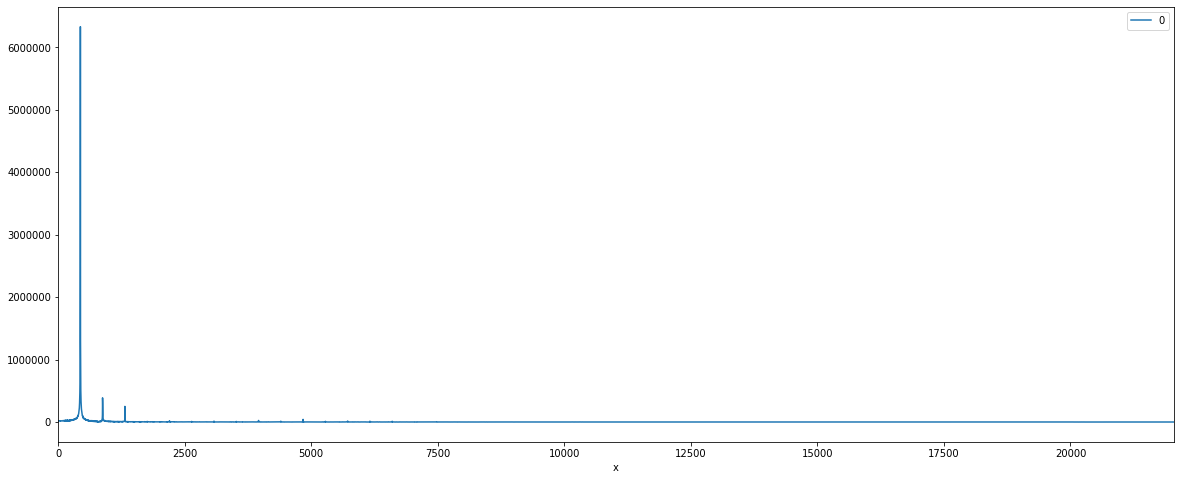

In [55]:
detect1Max(sdata)

1144
1144


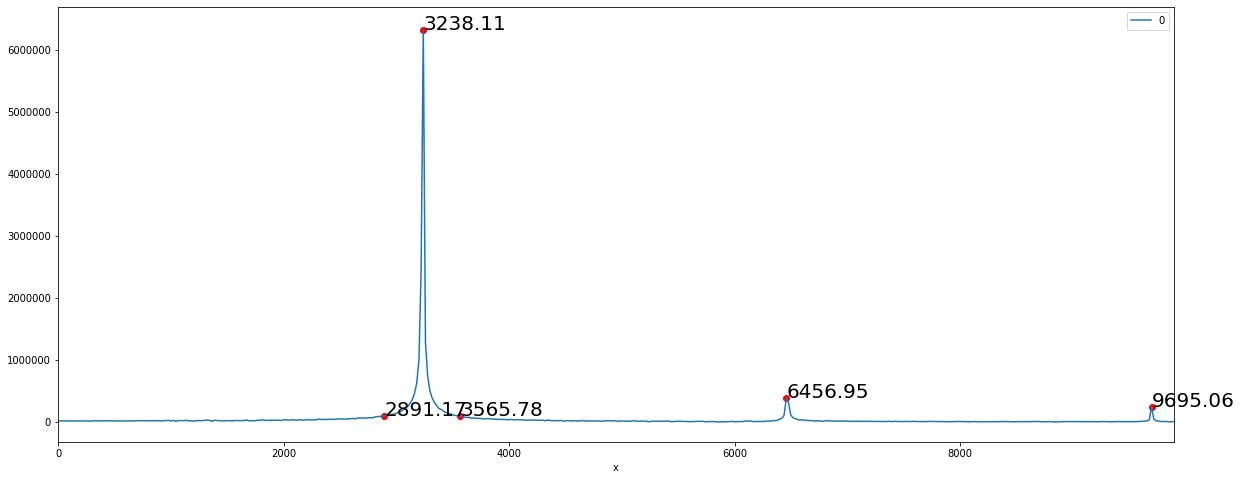

In [24]:
sdata=data[8192:25000]
#fft=getfft(sdata)
x,y=detectNMaxFreq(fft)
# DO stuff with the points, like telling you 'too low' or 'too high'
# target note or stuff like that
plotNptsOnfft(fft,x,y)


In [16]:

fft = getfft(sdata)
peaks=find_peaks(fft, threshold=10000)[0]
xarr=[x[p] for p in list(peaks)]
display(xarr)

IndexError: list index out of range

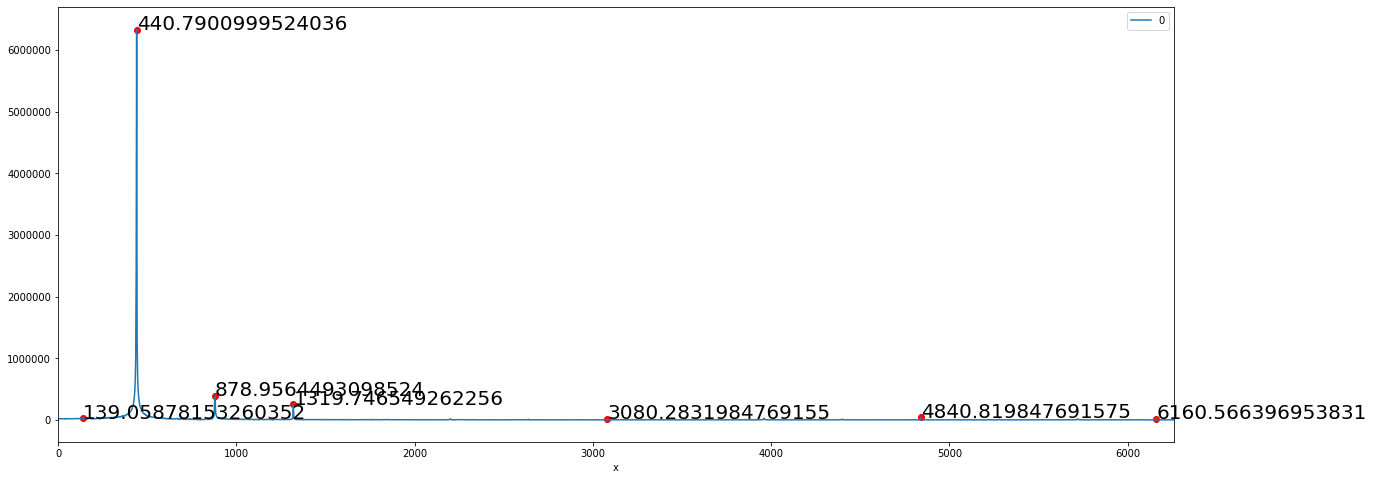

In [10]:
detectNMax(sdata)

In [21]:
def low_pass(datafft,lim,SR=44100):
    N=len(datafft)
    t=2*N/SR#because we get the fft data that has been already cut in half to remove the redundant part 
    alim=int(lim*t)
    return [a/t for a in range(alim+1)]

In [23]:
print(len(fft))
xvlc=low_pass(fft,3000)
fft=fft[0:len(xvlc)]
print(len(fft))
print(len(xvlc))

8404
1144
1144


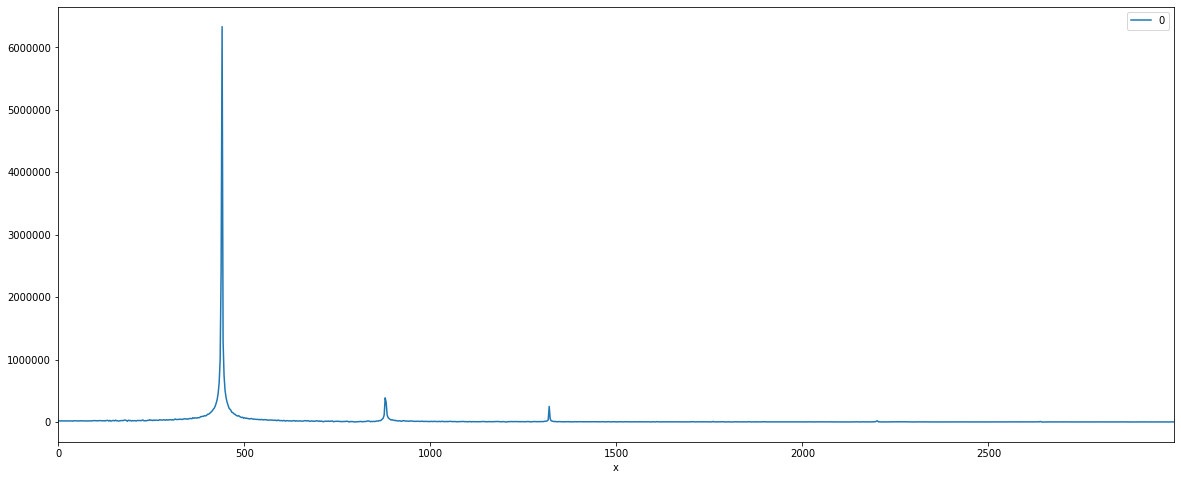

In [26]:
qp(fft,xvlc)

In [21]:
list(peaks[0])


[15, 32, 48, 55, 61]